In [7]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint

from RungeKutta import *

### Reading data

In [8]:
dir   = "DATA/"
file1 = 'BHBH.csv'
file2 = 'BHBHm.csv'

BHBH  = pd.read_csv(dir+file1)
BHBHm = pd.read_csv(dir+file2)

Text(0.5, 1.0, 'alpha')

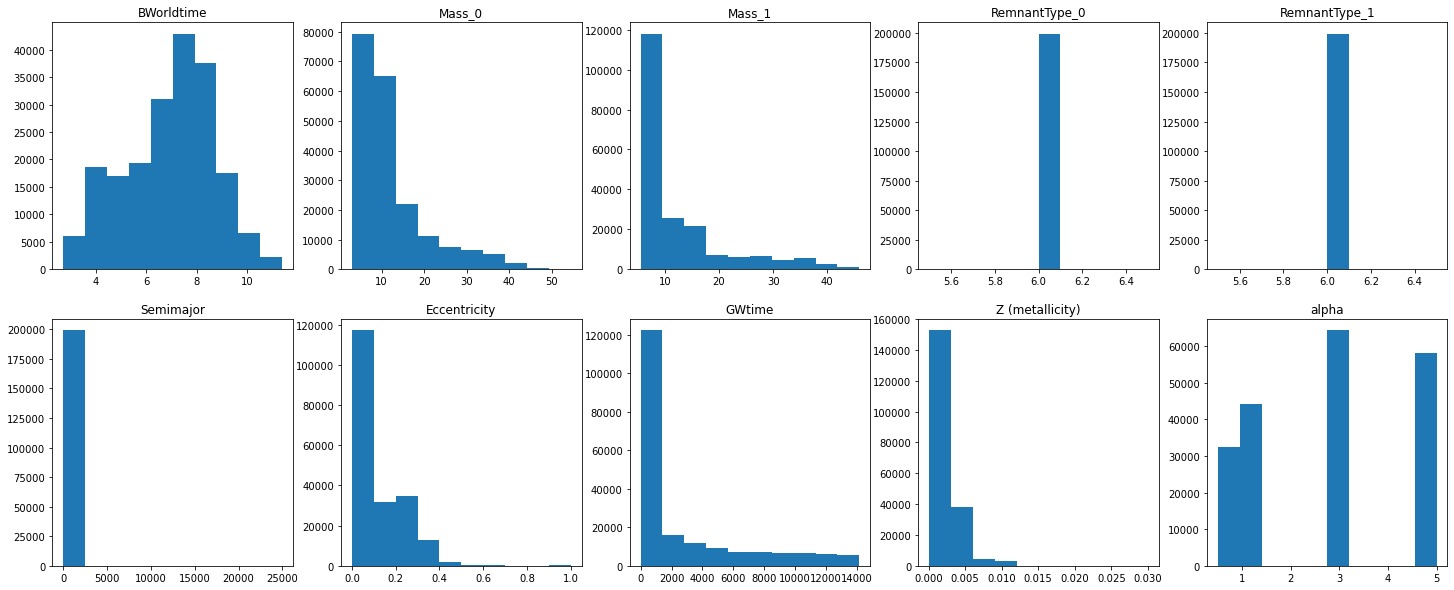

In [9]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(25, 10))

ax[0,0].hist(BHBHm.BWorldtime)
ax[0,0].set_title('BWorldtime')

ax[0,1].hist(BHBHm.Mass_0)
ax[0,1].set_title('Mass_0')

ax[0,2].hist(BHBHm.Mass_1)
ax[0,2].set_title('Mass_1')

ax[0,3].hist(BHBHm.RemnantType_0)
ax[0,3].set_title('RemnantType_0')

ax[0,4].hist(BHBHm.RemnantType_1)
ax[0,4].set_title('RemnantType_1')

ax[1,0].hist(BHBHm.Semimajor)
ax[1,0].set_title('Semimajor')

ax[1,1].hist(BHBHm.Eccentricity)
ax[1,1].set_title('Eccentricity')

ax[1,2].hist(BHBHm.GWtime)
ax[1,2].set_title('GWtime')

ax[1,3].hist(BHBHm.Z)
ax[1,3].set_title('Z (metallicity)')

ax[1,4].hist(BHBHm.alpha)
ax[1,4].set_title('alpha')

### Integration of the system of differential Equations

Here the functions in RungeKutta.py are used: the method uses a 4th order Runge-Kutta method.

In [10]:
TMIN = 0;  TMAX = 13 # s
a0   = 56;   e0 = .02
#initial_state = (a0, e0)
NSTEPS        = int(1e6)

# just for the try
M1, M2 = BHBH[['Mass_0', 'Mass_1']].iloc[0]

h = ( TMAX - TMIN ) / (NSTEPS - 1.)
t = np.linspace(TMIN, TMAX, NSTEPS)

a, e = (np.zeros(shape=NSTEPS) for i in range(N))

a[0] = a0
e[0] = e0

for i in range(NSTEPS-1):
    yin    = [a[i], e[i]]
    yout   = ODE_RK( t[i], yin, h, M2, M1 )
    a[i+1] = yout[0]
    e[i+1] = yout[1]

In [11]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[a<=0][0])
print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[e<=0][0])

Time instant in which the Semimajor axis goes to 0:		 12.567268567268567
Time instant in which the Eccentricity axis goes to 0:		 12.567268567268567


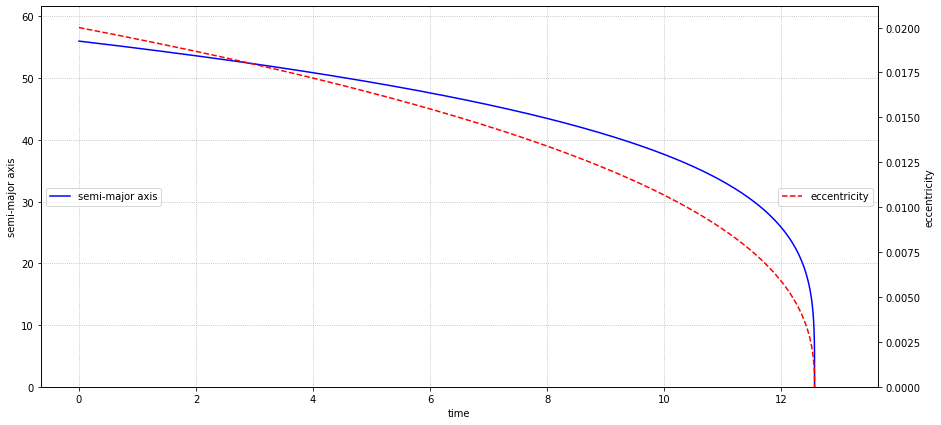

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,a,'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

ax_ = ax.twinx()
ax_.plot(t,e,'r--', label='eccentricity')
ax_.set_ylabel('eccentricity')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0)
plt.show()

In [13]:
initial_state = (a0, e0)

def system_ODE(curr_state, t, M, m):
    return deriv( t, curr_state, M, m )

z = odeint(system_ODE, initial_state, t, args=(M2, M1))

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1256725407990D+02   r2 =  0.2202092418424D-15
 lsoda--  warning..internal t (=r1) 

/home/aidin/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
print("Time instant in which the Semimajor axis goes to 0:\t\t",    t[z[:,0]<=0][0])
print("Time instant in which the Eccentricity axis goes to 0:\t\t", t[z[:,1]<=0][0])

Time instant in which the Semimajor axis goes to 0:		 12.567255567255568
Time instant in which the Eccentricity axis goes to 0:		 12.567255567255568


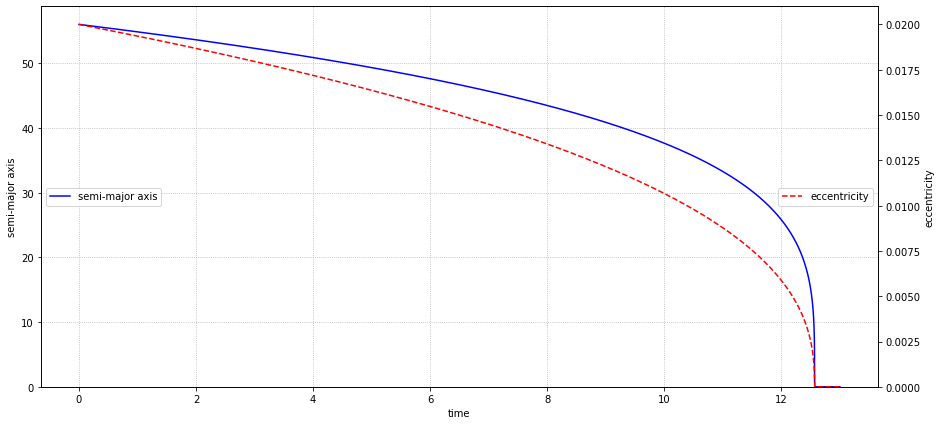

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(t,z[:,0],'b-',  label='semi-major axis')
ax.set_ylabel('semi-major axis')
ax.set_xlabel('time')
ax.legend(loc='center left')
ax.grid(ls='dotted')
ax.set_ylim(bottom=0)

ax_ = ax.twinx()
ax_.plot(t,z[:,1],'r--', label='eccentricity')
ax_.set_ylabel('eccentricity')
ax_.legend(loc='center right')
ax_.set_ylim(bottom=0)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

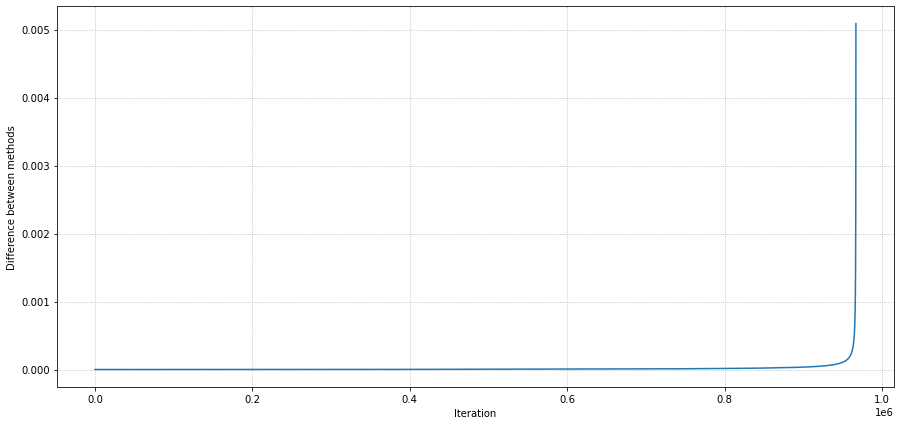

In [16]:
idx = list(x <= 0 for x in a).index(True)
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(a[:idx-100]-z[:idx-100,0])
ax.set_ylabel('Difference between methods')
ax.set_xlabel('Iteration')
ax.grid(ls='dotted')
plt.show

In [17]:
print('Delay time tabulated:\t\t', BHBH['GWtime'].iloc[0])

Delay time tabulated:		 99749.91


In [18]:
BHBHm = BHBHm.head(10)

h = ( TMAX - TMIN ) / (NSTEPS - 1.)
t = np.linspace(TMIN, TMAX, NSTEPS)

# delay = np.zeros(shape=len(BHBHm.index))

def delay_time(row, h, t):
    M1 = row.Mass_0
    M2 = row.Mass_1

    #a, e = (np.zeros(shape=NSTEPS) for i in range(N))
    a = row.Semimajor
    e = row.Eccentricity

    for i in range(NSTEPS-1):
        a, e = ODE_RK( t[i], [a, e], h, M2, M1 )
        if a <= 0 and e <= 0:
            break

    return t[i]

delay = BHBHm.apply(func=delay_time, axis='columns', args=(h, t))


/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/RungeKutta.py:31: RuntimeWarning: invalid value encountered in double_scalars
  dydx[0] = -64/5   *     G**3*M*m*(M+m)/(c**5*a**3*(1-e**2)**(7/2)) * (1 +  73/ 24*e**2 + 37/96*e**4)
/mnt/ec7a34b1-b7a6-4fbd-911d-c2a973711577/University/Laboratory_of_Computational_Physics/MOD.B/project/Delay-Time-Dist.-of-Compact-Binary-Objects/RungeKutta.py:32: RuntimeWarning: invalid value encountered in double_scalars
  dydx[1] = -304/15 * e * G**3*M*m*(M+m)/(c**5*a**4*(1-e**2)**(5/2)) * (1 + 121/304*e**2             )


In [19]:
delay

0     0.027859
1     1.480714
2     0.989925
3     1.428116
4    12.999987
5     0.000780
6     0.879451
7    12.999987
8     1.299273
9     1.678237
dtype: float64